In [159]:
# Import the necessary libarries for the project

import types
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import FactorAnalysis
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
from botocore.client import Config
#!conda install -c conda-forge googlemaps --yes
import ibm_boto3

print('Done installation')

Done installation


In [160]:
# The code was removed by Watson Studio for sharing.

In [161]:
# Map the csv to a pandas dataframe and display the head
# All the data variables are continuous for the purpose of Multiple Linear Regresssion Model and analysis

df_adoption = pd.read_csv(body)
df_adoption.head()

,A1,A2,A3,B1,B2,B3,B4,C1_1,C1_2,C1_3,...,F1_13,F1_14,F1_15,G1_1,G1_2,G1_3,ProvinceMappingToB1,City,Suburb,ConcatenatedList
0,1,3,6,1,1,4,4,7,7,6,...,6,6,5,5,5,4,Eastern Cape,Port Elizabeth,Adcockvale,"Adcockvale, Port Elizabeth, Eastern Cape"
1,1,4,5,1,2,4,3,3,3,3,...,6,5,5,6,6,5,Eastern Cape,Port Elizabeth,Algoa Bay,"Algoa Bay, Port Elizabeth, Eastern Cape"
2,1,2,4,1,2,3,1,7,6,4,...,6,6,5,5,5,5,Eastern Cape,Port Elizabeth,Amsterdam Hoek,"Amsterdam Hoek, Port Elizabeth, Eastern Cape"
3,1,4,4,1,2,4,3,6,6,5,...,6,6,6,5,5,5,Eastern Cape,Port Elizabeth,Arcadia,"Arcadia, Port Elizabeth, Eastern Cape"
4,1,4,4,1,2,4,3,3,7,5,...,7,7,7,5,5,5,Eastern Cape,Port Elizabeth,Benkamma,"Benkamma, Port Elizabeth, Eastern Cape"


In [162]:
# Data Wrangling - add readable headers to the adoption datatset

df_adoption_renamed = df_adoption

df_adoption_renamed.columns = [
    'WorkWithinSA_A1',
    'ScrumUsage_A2',
    'AgeGroup_A3',
    'Province_B1',
    'JobTitle_B2',
    'WorkExperience_B3',
    'WorkWithinOrg_B4',
    'experience_C1_1',
    'experience_C1_2',
    'experience_C1_3',
    'experience_C1_4',
    'esc_of_commitment_C1_5',
    'esc_of_commitment_C1_6',
    'esc_of_commitment_C1_7',
    'esc_of_commitment_C1_8',
    'over_engineering_C1_9',
    'over_engineering_C1_10',
    'over_engineering_C1_11',
    'over_engineering_C1_12',
    'communication_D1_1',
    'communication_D1_2',
    'communication_D1_3',
    'communication_D1_4',
    'teamwork_D1_5',
    'teamwork_D1_6',
    'teamwork_D1_7',
    'teamwork_D1_8',
    'specialisation_D1_9',
    'specialisation_D1_10',
    'specialisation_D1_11',
    'specialisation_D1_12',
    'sprint_management_D1_13',
    'sprint_management_D1_14',
    'sprint_management_D1_15',
    'sprint_management_D1_16',
    'change_resistant_D1_17',
    'change_resistant_D1_18',
    'change_resistant_D1_19',
    'change_resistant_D1_20',
    'training_E1_1',
    'training_E1_2',
    'training_E1_3',
    'training_E1_4',
    'recognition_E1_5',
    'recognition_E1_6',
    'recognition_E1_7',
    'recognition_E1_8',
    'quality_E1_9',
    'quality_E1_10',
    'quality_E1_11',
    'quality_E1_12',
    'resources_E1_13',
    'resources_E1_14',
    'resources_E1_15',
    'resources_E1_16',
    'collaboration_E1_17',
    'collaboration_E1_18',
    'collaboration_E1_19',
    'collaboration_E1_20',
    'management_support_E1_21',
    'management_support_E1_22',
    'management_support_E1_23',
    'organisational_culture_E1_24',
    'organisational_culture_E1_25',
    'organisational_culture_E1_26',
    'organisational_culture_E1_27',
    'organisational_structure_E1_28',
    'organisational_structure_E1_29',
    'organisational_structure_E1_30',
    'organisational_structure_E1_31',
    'relative_advantage_F1_1',
    'relative_advantage_F1_2',
    'relative_advantage_F1_3',
    'relative_advantage_F1_4',
    'relative_advantage_F1_5',
    'relative_advantage_F1_6',
    'complexity_F1_7',
    'complexity_F1_8',
    'complexity_F1_9',
    'complexity_F1_10',
    'compatibility_F1_11',
    'compatibility_F1_12',
    'compatibility_F1_13',
    'compatibility_F1_14',
    'compatibility_F1_15',
    'Adoption_G1_1',
    'Adoption_G1_2',
    'Adoption_G1_3',
    'ProvinceMappingToB1',
    'City',
    'Suburb',
    'ConcatenatedList'
]

df_adoption_renamed.head()

,WorkWithinSA_A1,ScrumUsage_A2,AgeGroup_A3,Province_B1,JobTitle_B2,WorkExperience_B3,WorkWithinOrg_B4,experience_C1_1,experience_C1_2,experience_C1_3,...,compatibility_F1_13,compatibility_F1_14,compatibility_F1_15,Adoption_G1_1,Adoption_G1_2,Adoption_G1_3,ProvinceMappingToB1,City,Suburb,ConcatenatedList
0,1,3,6,1,1,4,4,7,7,6,...,6,6,5,5,5,4,Eastern Cape,Port Elizabeth,Adcockvale,"Adcockvale, Port Elizabeth, Eastern Cape"
1,1,4,5,1,2,4,3,3,3,3,...,6,5,5,6,6,5,Eastern Cape,Port Elizabeth,Algoa Bay,"Algoa Bay, Port Elizabeth, Eastern Cape"
2,1,2,4,1,2,3,1,7,6,4,...,6,6,5,5,5,5,Eastern Cape,Port Elizabeth,Amsterdam Hoek,"Amsterdam Hoek, Port Elizabeth, Eastern Cape"
3,1,4,4,1,2,4,3,6,6,5,...,6,6,6,5,5,5,Eastern Cape,Port Elizabeth,Arcadia,"Arcadia, Port Elizabeth, Eastern Cape"
4,1,4,4,1,2,4,3,3,7,5,...,7,7,7,5,5,5,Eastern Cape,Port Elizabeth,Benkamma,"Benkamma, Port Elizabeth, Eastern Cape"


In [163]:
# display shape of data-set
df_adoption_renamed.shape

(207, 92)

In [164]:
# display data types of data-set
df_adoption_renamed.dtypes

WorkWithinSA_A1                    int64
ScrumUsage_A2                      int64
AgeGroup_A3                        int64
Province_B1                        int64
JobTitle_B2                        int64
WorkExperience_B3                  int64
WorkWithinOrg_B4                   int64
experience_C1_1                    int64
experience_C1_2                    int64
experience_C1_3                    int64
experience_C1_4                    int64
esc_of_commitment_C1_5             int64
esc_of_commitment_C1_6             int64
esc_of_commitment_C1_7             int64
esc_of_commitment_C1_8             int64
over_engineering_C1_9              int64
over_engineering_C1_10             int64
over_engineering_C1_11             int64
over_engineering_C1_12             int64
communication_D1_1                 int64
communication_D1_2                 int64
communication_D1_3                 int64
communication_D1_4                 int64
teamwork_D1_5                      int64
teamwork_D1_6   

In [165]:
# Basic descriptive statistics on the data
df_adoption_renamed.describe()

,WorkWithinSA_A1,ScrumUsage_A2,AgeGroup_A3,Province_B1,JobTitle_B2,WorkExperience_B3,WorkWithinOrg_B4,experience_C1_1,experience_C1_2,experience_C1_3,...,complexity_F1_9,complexity_F1_10,compatibility_F1_11,compatibility_F1_12,compatibility_F1_13,compatibility_F1_14,compatibility_F1_15,Adoption_G1_1,Adoption_G1_2,Adoption_G1_3
count,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1.0,4.420290,4.710145,4.932367,5.594203,4.743961,3.125604,6.130435,6.289855,5.980676,...,4.922705,5.695652,5.942029,5.777778,5.797101,5.685990,5.376812,4.879227,4.956522,5.009662
std,0.0,1.132989,0.832031,2.856651,14.832383,1.313540,1.485748,1.423585,1.319401,1.507139,...,1.766412,1.230333,1.134850,1.284292,1.268510,1.391007,1.622967,1.242415,1.216011,1.165817
min,1.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,4.000000,4.000000,3.000000,2.000000,4.000000,2.000000,6.000000,6.000000,6.000000,...,4.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
50%,1.0,5.000000,5.000000,3.000000,2.000000,5.000000,3.000000,7.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000
75%,1.0,5.000000,5.000000,9.000000,5.000000,6.000000,4.000000,7.000000,7.000000,7.000000,...,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,6.000000
max,1.0,7.000000,6.000000,9.000000,99.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,6.000000


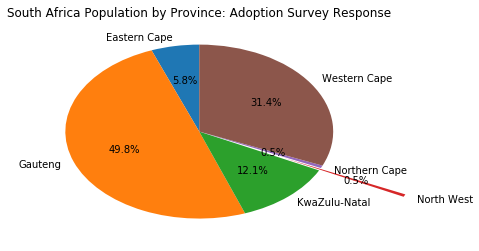

In [166]:
# Create a piecharts and bargraph to describe the dataset respondents
# respondents by province percentage
province_population = df_adoption_renamed.groupby('Province_B1').size()
provinces = ['Eastern Cape', 'Gauteng', 'KwaZulu-Natal', 'North West', 'Northern Cape', 'Western Cape']
# only "explode" the 4th  (i.e. 'North West')
explode = (0, 0, 0, 0.7, 0, 0)  

plt.pie(province_population, explode=explode, labels=provinces, autopct='%1.1f%%',
         startangle=90)
plt.title('South Africa Population by Province: Adoption Survey Response')
plt.show()

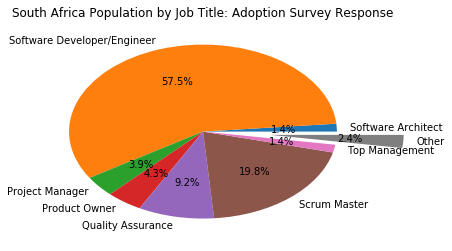

In [167]:
# respondents by job title percentage
title_population = df_adoption_renamed.groupby('JobTitle_B2').size()
titles = ['Software Architect', 'Software Developer/Engineer', 'Project Manager', 'Product Owner', 'Quality Assurance', 'Scrum Master', 'Top Management', 'Other']
# only "explode" the 4th  (i.e. 'North West')
explode = (0, 0, 0, 0, 0, 0, 0, 0.5)  

plt.pie(title_population, explode= explode, labels=titles, autopct='%1.1f%%',
        )
plt.title('South Africa Population by Job Title: Adoption Survey Response')
plt.show()

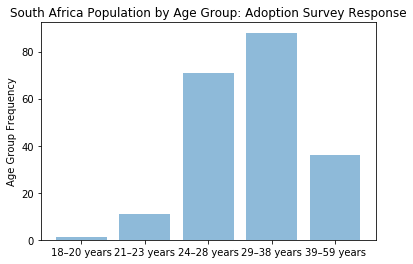

In [168]:
# respondents by age group frequency
titles = ('18–20 years', '21–23 years', '24–28 years', '29–38 years', '39–59 years')
y_pos = np.arange(len(titles))
ageGroups = df_adoption_renamed.groupby('AgeGroup_A3').size()

plt.bar(y_pos, ageGroups, align='center', alpha=0.5)
plt.xticks(y_pos, titles)
plt.ylabel('Age Group Frequency')
plt.title('South Africa Population by Age Group: Adoption Survey Response')

plt.show()

In [169]:
# Exploratory Factor Analysis (EFA)
# limit the columns
X=df_adoption_renamed[['experience_C1_1','experience_C1_2','experience_C1_3','experience_C1_4','esc_of_commitment_C1_5','esc_of_commitment_C1_6','esc_of_commitment_C1_7','esc_of_commitment_C1_8','over_engineering_C1_9','over_engineering_C1_10','over_engineering_C1_11','over_engineering_C1_12','communication_D1_1','communication_D1_2','communication_D1_3','communication_D1_4','teamwork_D1_5','teamwork_D1_6','teamwork_D1_7','teamwork_D1_8','specialisation_D1_9','specialisation_D1_10','specialisation_D1_11','specialisation_D1_12','sprint_management_D1_13','sprint_management_D1_14','sprint_management_D1_15','sprint_management_D1_16','change_resistant_D1_17','change_resistant_D1_18','change_resistant_D1_19','change_resistant_D1_20','training_E1_1','training_E1_2','training_E1_3','training_E1_4','recognition_E1_5','recognition_E1_6','recognition_E1_7','recognition_E1_8','quality_E1_9','quality_E1_10','quality_E1_11','quality_E1_12','resources_E1_13','resources_E1_14','resources_E1_15','resources_E1_16','collaboration_E1_17','collaboration_E1_18','collaboration_E1_19','collaboration_E1_20','management_support_E1_21','management_support_E1_22','management_support_E1_23','organisational_culture_E1_24','organisational_culture_E1_25','organisational_culture_E1_26','organisational_culture_E1_27','organisational_structure_E1_28','organisational_structure_E1_29','organisational_structure_E1_30','organisational_structure_E1_31','relative_advantage_F1_1','relative_advantage_F1_2','relative_advantage_F1_3','relative_advantage_F1_4','relative_advantage_F1_5','relative_advantage_F1_6','complexity_F1_7','complexity_F1_8','complexity_F1_9','complexity_F1_10','compatibility_F1_11','compatibility_F1_12','compatibility_F1_13','compatibility_F1_14','compatibility_F1_15','Adoption_G1_1','Adoption_G1_2','Adoption_G1_3']]
X.head()

,experience_C1_1,experience_C1_2,experience_C1_3,experience_C1_4,esc_of_commitment_C1_5,esc_of_commitment_C1_6,esc_of_commitment_C1_7,esc_of_commitment_C1_8,over_engineering_C1_9,over_engineering_C1_10,...,complexity_F1_9,complexity_F1_10,compatibility_F1_11,compatibility_F1_12,compatibility_F1_13,compatibility_F1_14,compatibility_F1_15,Adoption_G1_1,Adoption_G1_2,Adoption_G1_3
0,7,7,6,7,6,6,6,2,6,3,...,5,5,6,6,6,6,5,5,5,4
1,3,3,3,2,2,2,2,2,2,3,...,6,6,5,5,6,5,5,6,6,5
2,7,6,4,7,6,6,6,6,6,2,...,6,6,6,6,6,6,5,5,5,5
3,6,6,5,7,7,7,5,4,4,4,...,6,6,6,6,6,6,6,5,5,5
4,3,7,5,7,5,6,5,2,2,1,...,6,6,7,7,7,7,7,5,5,5


In [170]:
# Get the factors
fact_15c=FactorAnalysis(n_components=15)
X_factor=fact_15c.fit_transform(X)

In [171]:
# Display the factor details
X_factor

array([[ 1.78823272,  1.01529116, -0.64372641, ..., -0.35680197,
         0.32858799,  0.03863048],
       [ 1.04702697, -0.75421303,  0.74750097, ...,  1.01646862,
        -0.1538101 ,  0.11555682],
       [-0.76457733, -0.1258143 , -0.03540198, ..., -0.55821603,
         0.60224668,  0.03915154],
       ..., 
       [ 0.44144479, -1.32294903,  0.17520234, ...,  0.54275364,
         0.6796187 ,  0.11067821],
       [-0.57394747,  0.3844541 , -1.59974191, ...,  1.25984366,
        -0.19482295,  0.0093372 ],
       [-0.90279802,  0.41497872,  0.2039411 , ...,  1.30509501,
        -0.59571872,  0.75534077]])

In [172]:
# Building the Multiple Linear Regression Model
# Split between test and train set
msk = np.random.rand(len(df_adoption_renamed)) < 0.8
train = X[msk]
test = X[~msk]

In [173]:
# Insert the independant variables as the X, and dependent variables as Y
# Display the coefficients

from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['experience_C1_1','experience_C1_2','experience_C1_3','experience_C1_4','esc_of_commitment_C1_5',
                         'esc_of_commitment_C1_6','esc_of_commitment_C1_7','esc_of_commitment_C1_8','over_engineering_C1_9','over_engineering_C1_10',
                         'over_engineering_C1_11','over_engineering_C1_12','communication_D1_1','communication_D1_2','communication_D1_3',
                         'communication_D1_4','teamwork_D1_5','teamwork_D1_6','teamwork_D1_7','teamwork_D1_8','specialisation_D1_9',
                         'specialisation_D1_10','specialisation_D1_11','specialisation_D1_12','sprint_management_D1_13','sprint_management_D1_14',
                         'sprint_management_D1_15','sprint_management_D1_16','change_resistant_D1_17','change_resistant_D1_18','change_resistant_D1_19',
                         'change_resistant_D1_20','training_E1_1','training_E1_2','training_E1_3','training_E1_4','recognition_E1_5','recognition_E1_6',
                         'recognition_E1_7','recognition_E1_8','quality_E1_9','quality_E1_10','quality_E1_11','quality_E1_12','resources_E1_13',
                         'resources_E1_14','resources_E1_15','resources_E1_16','collaboration_E1_17','collaboration_E1_18','collaboration_E1_19',
                         'collaboration_E1_20','management_support_E1_21','management_support_E1_22','management_support_E1_23','organisational_culture_E1_24',
                         'organisational_culture_E1_25','organisational_culture_E1_26','organisational_culture_E1_27','organisational_structure_E1_28',
                         'organisational_structure_E1_29','organisational_structure_E1_30','organisational_structure_E1_31','relative_advantage_F1_1',
                         'relative_advantage_F1_2','relative_advantage_F1_3','relative_advantage_F1_4','relative_advantage_F1_5','relative_advantage_F1_6',
                         'complexity_F1_7','complexity_F1_8','complexity_F1_9','complexity_F1_10','compatibility_F1_11','compatibility_F1_12','compatibility_F1_13',
                         'compatibility_F1_14','compatibility_F1_15']])
y = np.asanyarray(train[['Adoption_G1_1','Adoption_G1_2','Adoption_G1_3']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 0.2629548  -0.1718043  -0.04751236 -0.19088155 -0.02120981 -0.01685441
   0.03589423 -0.00990481  0.07244454  0.08612357 -0.2187448   0.12017564
   0.06509107 -0.10111133  0.21034699  0.03975154 -0.0890368  -0.12790865
   0.10027975  0.01105817 -0.02143907  0.15537124 -0.11637622 -0.11546516
  -0.05987753  0.10319157 -0.11755821  0.06521124 -0.04029331  0.16922373
  -0.18814219 -0.06201037 -0.19195809  0.17046082  0.3264677  -0.33218474
  -0.05486219 -0.05714516  0.05818345  0.19909266 -0.12107272  0.06207647
  -0.15043556 -0.03228923 -0.05517595  0.08404214  0.17129823 -0.21190744
   0.01057313 -0.00549803 -0.10445267  0.15882121  0.06909275  0.20975819
  -0.01171534 -0.32892371  0.30253181  0.05731448 -0.10796836 -0.1716132
   0.12520852  0.16267298 -0.35043984  0.00587423 -0.13991979 -0.09221308
   0.26572039 -0.00343887  0.32798381  0.03161179 -0.22868844  0.0543215
   0.2932309   0.39826162 -0.0269742  -0.09684351  0.10509685  0.10696488]
 [ 0.12994986 -0.1254249

In [174]:
# Create the predictve analysis using Multiple Linear Regression and the trained data

y_hat= regr.predict(test[['experience_C1_1','experience_C1_2','experience_C1_3','experience_C1_4','esc_of_commitment_C1_5',
                         'esc_of_commitment_C1_6','esc_of_commitment_C1_7','esc_of_commitment_C1_8','over_engineering_C1_9','over_engineering_C1_10',
                         'over_engineering_C1_11','over_engineering_C1_12','communication_D1_1','communication_D1_2','communication_D1_3',
                         'communication_D1_4','teamwork_D1_5','teamwork_D1_6','teamwork_D1_7','teamwork_D1_8','specialisation_D1_9',
                         'specialisation_D1_10','specialisation_D1_11','specialisation_D1_12','sprint_management_D1_13','sprint_management_D1_14',
                         'sprint_management_D1_15','sprint_management_D1_16','change_resistant_D1_17','change_resistant_D1_18','change_resistant_D1_19',
                         'change_resistant_D1_20','training_E1_1','training_E1_2','training_E1_3','training_E1_4','recognition_E1_5','recognition_E1_6',
                         'recognition_E1_7','recognition_E1_8','quality_E1_9','quality_E1_10','quality_E1_11','quality_E1_12','resources_E1_13',
                         'resources_E1_14','resources_E1_15','resources_E1_16','collaboration_E1_17','collaboration_E1_18','collaboration_E1_19',
                         'collaboration_E1_20','management_support_E1_21','management_support_E1_22','management_support_E1_23','organisational_culture_E1_24',
                         'organisational_culture_E1_25','organisational_culture_E1_26','organisational_culture_E1_27','organisational_structure_E1_28',
                         'organisational_structure_E1_29','organisational_structure_E1_30','organisational_structure_E1_31','relative_advantage_F1_1',
                         'relative_advantage_F1_2','relative_advantage_F1_3','relative_advantage_F1_4','relative_advantage_F1_5','relative_advantage_F1_6',
                         'complexity_F1_7','complexity_F1_8','complexity_F1_9','complexity_F1_10','compatibility_F1_11','compatibility_F1_12','compatibility_F1_13',
                         'compatibility_F1_14','compatibility_F1_15']])
x = np.asanyarray(test[['experience_C1_1','experience_C1_2','experience_C1_3','experience_C1_4','esc_of_commitment_C1_5',
                         'esc_of_commitment_C1_6','esc_of_commitment_C1_7','esc_of_commitment_C1_8','over_engineering_C1_9','over_engineering_C1_10',
                         'over_engineering_C1_11','over_engineering_C1_12','communication_D1_1','communication_D1_2','communication_D1_3',
                         'communication_D1_4','teamwork_D1_5','teamwork_D1_6','teamwork_D1_7','teamwork_D1_8','specialisation_D1_9',
                         'specialisation_D1_10','specialisation_D1_11','specialisation_D1_12','sprint_management_D1_13','sprint_management_D1_14',
                         'sprint_management_D1_15','sprint_management_D1_16','change_resistant_D1_17','change_resistant_D1_18','change_resistant_D1_19',
                         'change_resistant_D1_20','training_E1_1','training_E1_2','training_E1_3','training_E1_4','recognition_E1_5','recognition_E1_6',
                         'recognition_E1_7','recognition_E1_8','quality_E1_9','quality_E1_10','quality_E1_11','quality_E1_12','resources_E1_13',
                         'resources_E1_14','resources_E1_15','resources_E1_16','collaboration_E1_17','collaboration_E1_18','collaboration_E1_19',
                         'collaboration_E1_20','management_support_E1_21','management_support_E1_22','management_support_E1_23','organisational_culture_E1_24',
                         'organisational_culture_E1_25','organisational_culture_E1_26','organisational_culture_E1_27','organisational_structure_E1_28',
                         'organisational_structure_E1_29','organisational_structure_E1_30','organisational_structure_E1_31','relative_advantage_F1_1',
                         'relative_advantage_F1_2','relative_advantage_F1_3','relative_advantage_F1_4','relative_advantage_F1_5','relative_advantage_F1_6',
                         'complexity_F1_7','complexity_F1_8','complexity_F1_9','complexity_F1_10','compatibility_F1_11','compatibility_F1_12','compatibility_F1_13',
                         'compatibility_F1_14','compatibility_F1_15']])
y = np.asanyarray(test[['Adoption_G1_1','Adoption_G1_2','Adoption_G1_3']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 1.89
Variance score: -0.41


In [175]:
# Displaying the data on the Foursquare map

import requests # library to handle requests
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [176]:
# The code was removed by Watson Studio for sharing.

In [177]:
# Set the map to South Africa
# This co-ordinates is more or less central in south africa
address = 'South Africa'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-28.8166236 24.991639


In [178]:
# The code was removed by Watson Studio for sharing.

Done configuration


In [179]:
# Create function for extrating coordinates from google api

def geocode_address(loc):
    geocode_result = gmaps.geocode(loc)
    latitude = geocode_result[0]["geometry"]["location"]["lat"]
    longitude = geocode_result[0]["geometry"]["location"]["lng"]
    return latitude,longitude


In [180]:
# Loop through the coordinate dataframe and add the latitude and longitude to the df_adoption_renamed
# Create empty columns for the latitude and longitude 
df_adoption_renamed['Latitude'] = ""
df_adoption_renamed['Longitude'] = ""
#df_adoption_renamed['Province'] = ""
            
df_adoption_renamed.head()

,WorkWithinSA_A1,ScrumUsage_A2,AgeGroup_A3,Province_B1,JobTitle_B2,WorkExperience_B3,WorkWithinOrg_B4,experience_C1_1,experience_C1_2,experience_C1_3,...,compatibility_F1_15,Adoption_G1_1,Adoption_G1_2,Adoption_G1_3,ProvinceMappingToB1,City,Suburb,ConcatenatedList,Latitude,Longitude
0,1,3,6,1,1,4,4,7,7,6,...,5,5,5,4,Eastern Cape,Port Elizabeth,Adcockvale,"Adcockvale, Port Elizabeth, Eastern Cape",,
1,1,4,5,1,2,4,3,3,3,3,...,5,6,6,5,Eastern Cape,Port Elizabeth,Algoa Bay,"Algoa Bay, Port Elizabeth, Eastern Cape",,
2,1,2,4,1,2,3,1,7,6,4,...,5,5,5,5,Eastern Cape,Port Elizabeth,Amsterdam Hoek,"Amsterdam Hoek, Port Elizabeth, Eastern Cape",,
3,1,4,4,1,2,4,3,6,6,5,...,6,5,5,5,Eastern Cape,Port Elizabeth,Arcadia,"Arcadia, Port Elizabeth, Eastern Cape",,
4,1,4,4,1,2,4,3,3,7,5,...,7,5,5,5,Eastern Cape,Port Elizabeth,Benkamma,"Benkamma, Port Elizabeth, Eastern Cape",,


In [181]:
# Extract the coordinates
pd.set_option('mode.chained_assignment', None) # set the warning off

for i in range(0,len(df_adoption_renamed)):
    df_adoption_renamed['Latitude'][i],df_adoption_renamed['Longitude'][i]=geocode_address(df_adoption_renamed.iloc[i]['ConcatenatedList'])
    

In [182]:
# The GPS Coordinates have been added
df_adoption_renamed.head()

,WorkWithinSA_A1,ScrumUsage_A2,AgeGroup_A3,Province_B1,JobTitle_B2,WorkExperience_B3,WorkWithinOrg_B4,experience_C1_1,experience_C1_2,experience_C1_3,...,compatibility_F1_15,Adoption_G1_1,Adoption_G1_2,Adoption_G1_3,ProvinceMappingToB1,City,Suburb,ConcatenatedList,Latitude,Longitude
0,1,3,6,1,1,4,4,7,7,6,...,5,5,5,4,Eastern Cape,Port Elizabeth,Adcockvale,"Adcockvale, Port Elizabeth, Eastern Cape",-33.9417,25.5814
1,1,4,5,1,2,4,3,3,3,3,...,5,6,6,5,Eastern Cape,Port Elizabeth,Algoa Bay,"Algoa Bay, Port Elizabeth, Eastern Cape",-33.9608,25.6022
2,1,2,4,1,2,3,1,7,6,4,...,5,5,5,5,Eastern Cape,Port Elizabeth,Amsterdam Hoek,"Amsterdam Hoek, Port Elizabeth, Eastern Cape",-33.8546,25.6172
3,1,4,4,1,2,4,3,6,6,5,...,6,5,5,5,Eastern Cape,Port Elizabeth,Arcadia,"Arcadia, Port Elizabeth, Eastern Cape",-33.8646,25.5119
4,1,4,4,1,2,4,3,3,7,5,...,7,5,5,5,Eastern Cape,Port Elizabeth,Benkamma,"Benkamma, Port Elizabeth, Eastern Cape",-33.9622,25.4919


In [183]:
# Get the adoption results
adoption_results = df_adoption_renamed

adoption_results['Adoption'] = ""
adoption_results['Rejection'] = ""
adoption_results['Color'] = ""

for i in range(0,len(adoption_results)):
        if ((adoption_results['Adoption_G1_1'][i] + adoption_results['Adoption_G1_2'][i] + adoption_results['Adoption_G1_3'][i]) > 12):
            adoption_results['Adoption'][i] = 1
            adoption_results['Rejection'][i] = 0
            adoption_results['Color'][i] = "green"
        else:
            adoption_results['Adoption'][i] = 0
            adoption_results['Rejection'][i] = 1
            adoption_results['Color'][i] = "red"

In [184]:
# display the updated dataframe

adoption_results.head()

,WorkWithinSA_A1,ScrumUsage_A2,AgeGroup_A3,Province_B1,JobTitle_B2,WorkExperience_B3,WorkWithinOrg_B4,experience_C1_1,experience_C1_2,experience_C1_3,...,Adoption_G1_3,ProvinceMappingToB1,City,Suburb,ConcatenatedList,Latitude,Longitude,Adoption,Rejection,Color
0,1,3,6,1,1,4,4,7,7,6,...,4,Eastern Cape,Port Elizabeth,Adcockvale,"Adcockvale, Port Elizabeth, Eastern Cape",-33.9417,25.5814,1,0,green
1,1,4,5,1,2,4,3,3,3,3,...,5,Eastern Cape,Port Elizabeth,Algoa Bay,"Algoa Bay, Port Elizabeth, Eastern Cape",-33.9608,25.6022,1,0,green
2,1,2,4,1,2,3,1,7,6,4,...,5,Eastern Cape,Port Elizabeth,Amsterdam Hoek,"Amsterdam Hoek, Port Elizabeth, Eastern Cape",-33.8546,25.6172,1,0,green
3,1,4,4,1,2,4,3,6,6,5,...,5,Eastern Cape,Port Elizabeth,Arcadia,"Arcadia, Port Elizabeth, Eastern Cape",-33.8646,25.5119,1,0,green
4,1,4,4,1,2,4,3,3,7,5,...,5,Eastern Cape,Port Elizabeth,Benkamma,"Benkamma, Port Elizabeth, Eastern Cape",-33.9622,25.4919,1,0,green


In [185]:
# prep the dataframe for clustering

# Drop the unnecessary columns

southafrica_clustering = adoption_results.drop('WorkWithinSA_A1',1)
southafrica_clustering = southafrica_clustering.drop('ScrumUsage_A2',1)
southafrica_clustering = southafrica_clustering.drop('AgeGroup_A3',1)
southafrica_clustering = southafrica_clustering.drop('Province_B1',1)
southafrica_clustering = southafrica_clustering.drop('JobTitle_B2',1)
southafrica_clustering = southafrica_clustering.drop('WorkExperience_B3',1)
southafrica_clustering = southafrica_clustering.drop('WorkWithinOrg_B4',1)
southafrica_clustering = southafrica_clustering.drop('experience_C1_1',1)
southafrica_clustering = southafrica_clustering.drop('experience_C1_2',1)
southafrica_clustering = southafrica_clustering.drop('experience_C1_3',1)
southafrica_clustering = southafrica_clustering.drop('experience_C1_4',1)
southafrica_clustering = southafrica_clustering.drop('esc_of_commitment_C1_5',1)
southafrica_clustering = southafrica_clustering.drop('esc_of_commitment_C1_6',1)
southafrica_clustering = southafrica_clustering.drop('esc_of_commitment_C1_7',1)
southafrica_clustering = southafrica_clustering.drop('esc_of_commitment_C1_8',1)
southafrica_clustering = southafrica_clustering.drop('over_engineering_C1_9',1)
southafrica_clustering = southafrica_clustering.drop('over_engineering_C1_10',1)
southafrica_clustering = southafrica_clustering.drop('over_engineering_C1_11',1)
southafrica_clustering = southafrica_clustering.drop('over_engineering_C1_12',1)
southafrica_clustering = southafrica_clustering.drop('communication_D1_1',1)
southafrica_clustering = southafrica_clustering.drop('communication_D1_2',1)
southafrica_clustering = southafrica_clustering.drop('communication_D1_3',1)
southafrica_clustering = southafrica_clustering.drop('communication_D1_4',1)
southafrica_clustering = southafrica_clustering.drop('teamwork_D1_5',1)
southafrica_clustering = southafrica_clustering.drop('teamwork_D1_6',1)
southafrica_clustering = southafrica_clustering.drop('teamwork_D1_7',1)
southafrica_clustering = southafrica_clustering.drop('teamwork_D1_8',1)
southafrica_clustering = southafrica_clustering.drop('specialisation_D1_9',1)
southafrica_clustering = southafrica_clustering.drop('specialisation_D1_10',1)
southafrica_clustering = southafrica_clustering.drop('specialisation_D1_11',1)
southafrica_clustering = southafrica_clustering.drop('specialisation_D1_12',1)
southafrica_clustering = southafrica_clustering.drop('sprint_management_D1_13',1)
southafrica_clustering = southafrica_clustering.drop('sprint_management_D1_14',1)
southafrica_clustering = southafrica_clustering.drop('sprint_management_D1_15',1)
southafrica_clustering = southafrica_clustering.drop('sprint_management_D1_16',1)
southafrica_clustering = southafrica_clustering.drop('change_resistant_D1_17',1)
southafrica_clustering = southafrica_clustering.drop('change_resistant_D1_18',1)
southafrica_clustering = southafrica_clustering.drop('change_resistant_D1_19',1)
southafrica_clustering = southafrica_clustering.drop('change_resistant_D1_20',1)
southafrica_clustering = southafrica_clustering.drop('training_E1_1',1)
southafrica_clustering = southafrica_clustering.drop('training_E1_2',1)
southafrica_clustering = southafrica_clustering.drop('training_E1_3',1)
southafrica_clustering = southafrica_clustering.drop('training_E1_4',1)
southafrica_clustering = southafrica_clustering.drop('recognition_E1_5',1)
southafrica_clustering = southafrica_clustering.drop('recognition_E1_6',1)
southafrica_clustering = southafrica_clustering.drop('recognition_E1_7',1)
southafrica_clustering = southafrica_clustering.drop('recognition_E1_8',1)
southafrica_clustering = southafrica_clustering.drop('quality_E1_9',1)
southafrica_clustering = southafrica_clustering.drop('quality_E1_10',1)
southafrica_clustering = southafrica_clustering.drop('quality_E1_11',1)
southafrica_clustering = southafrica_clustering.drop('quality_E1_12',1)
southafrica_clustering = southafrica_clustering.drop('resources_E1_13',1)
southafrica_clustering = southafrica_clustering.drop('resources_E1_14',1)
southafrica_clustering = southafrica_clustering.drop('resources_E1_15',1)
southafrica_clustering = southafrica_clustering.drop('resources_E1_16',1)
southafrica_clustering = southafrica_clustering.drop('collaboration_E1_17',1)
southafrica_clustering = southafrica_clustering.drop('collaboration_E1_18',1)
southafrica_clustering = southafrica_clustering.drop('collaboration_E1_19',1)
southafrica_clustering = southafrica_clustering.drop('collaboration_E1_20',1)
southafrica_clustering = southafrica_clustering.drop('management_support_E1_21',1)
southafrica_clustering = southafrica_clustering.drop('management_support_E1_22',1)
southafrica_clustering = southafrica_clustering.drop('management_support_E1_23',1)
southafrica_clustering = southafrica_clustering.drop('organisational_culture_E1_24',1)
southafrica_clustering = southafrica_clustering.drop('organisational_culture_E1_25',1)
southafrica_clustering = southafrica_clustering.drop('organisational_culture_E1_26',1)
southafrica_clustering = southafrica_clustering.drop('organisational_culture_E1_27',1)
southafrica_clustering = southafrica_clustering.drop('organisational_structure_E1_28',1)
southafrica_clustering = southafrica_clustering.drop('organisational_structure_E1_29',1)
southafrica_clustering = southafrica_clustering.drop('organisational_structure_E1_30',1)
southafrica_clustering = southafrica_clustering.drop('organisational_structure_E1_31',1)
southafrica_clustering = southafrica_clustering.drop('relative_advantage_F1_1',1)
southafrica_clustering = southafrica_clustering.drop('relative_advantage_F1_2',1)
southafrica_clustering = southafrica_clustering.drop('relative_advantage_F1_3',1)
southafrica_clustering = southafrica_clustering.drop('relative_advantage_F1_4',1)
southafrica_clustering = southafrica_clustering.drop('relative_advantage_F1_5',1)
southafrica_clustering = southafrica_clustering.drop('relative_advantage_F1_6',1)
southafrica_clustering = southafrica_clustering.drop('complexity_F1_7',1)
southafrica_clustering = southafrica_clustering.drop('complexity_F1_8',1)
southafrica_clustering = southafrica_clustering.drop('complexity_F1_9',1)
southafrica_clustering = southafrica_clustering.drop('complexity_F1_10',1)
southafrica_clustering = southafrica_clustering.drop('compatibility_F1_11',1)
southafrica_clustering = southafrica_clustering.drop('compatibility_F1_12',1)
southafrica_clustering = southafrica_clustering.drop('compatibility_F1_13',1)
southafrica_clustering = southafrica_clustering.drop('compatibility_F1_14',1)
southafrica_clustering = southafrica_clustering.drop('compatibility_F1_15',1)
southafrica_clustering = southafrica_clustering.drop('Adoption_G1_1',1)
southafrica_clustering = southafrica_clustering.drop('Adoption_G1_2',1)
southafrica_clustering = southafrica_clustering.drop('Adoption_G1_3',1)
southafrica_clustering = southafrica_clustering.drop('Adoption',1)
southafrica_clustering = southafrica_clustering.drop('Rejection',1)
southafrica_clustering = southafrica_clustering.drop('ProvinceMappingToB1',1)
southafrica_clustering = southafrica_clustering.drop('City',1)
southafrica_clustering = southafrica_clustering.drop('Suburb',1)
southafrica_clustering = southafrica_clustering.drop('ConcatenatedList',1)
southafrica_clustering = southafrica_clustering.drop('Color',1)

In [186]:
# set number of clusters
from sklearn.cluster import KMeans
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(southafrica_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [187]:
# add clustering labels
southAfrica_data = adoption_results
southAfrica_data.insert(0, 'Cluster Labels', kmeans.labels_)

southAfrica_data.tail() # check the last columns!

,Cluster Labels,WorkWithinSA_A1,ScrumUsage_A2,AgeGroup_A3,Province_B1,JobTitle_B2,WorkExperience_B3,WorkWithinOrg_B4,experience_C1_1,experience_C1_2,...,Adoption_G1_3,ProvinceMappingToB1,City,Suburb,ConcatenatedList,Latitude,Longitude,Adoption,Rejection,Color
202,0,1,6,5,9,2,6,3,7,6,...,5,Western Cape,Stellenbosch,Jamestown,"Jamestown, Stellenbosch, Western Cape",-33.9791,18.847,1,0,green
203,0,1,5,6,9,6,7,7,7,7,...,6,Western Cape,Stellenbosch,Karindal,"Karindal, Stellenbosch, Western Cape",-33.9376,18.8886,1,0,green
204,0,1,3,5,9,5,6,2,6,6,...,4,Western Cape,Stellenbosch,Kayamandi,"Kayamandi, Stellenbosch, Western Cape",-33.9183,18.8448,0,1,red
205,0,1,5,5,9,2,4,3,6,7,...,6,Western Cape,Stellenbosch,Krigeville,"Krigeville, Stellenbosch, Western Cape",-33.946,18.8566,1,0,green
206,0,1,5,4,9,2,4,4,6,6,...,6,Western Cape,Stellenbosch,Kylemore,"Kylemore, Stellenbosch, Western Cape",-33.9194,18.9525,1,0,green


In [188]:
# create map of South Africa using latitude and longitude values and map it to the clusters
# For adoption responses it is green
# For rejection responses it is red

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, color in zip(southAfrica_data['Latitude'], southAfrica_data['Longitude'], southAfrica_data['ConcatenatedList'], southAfrica_data['Cluster Labels'], southAfrica_data['Color']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [189]:
# display the Scrum adoption by Province and Sum
Adoption_Frequency = southAfrica_data[['ProvinceMappingToB1','Adoption','Rejection']]

#Adoption_groups = Adoption_Frequency.groupby(['ProvinceMappingToB1','Adoption','Rejection']).size().reset_index().groupby('Adoption')[[0]].max()
Adoption_groups =Adoption_Frequency.groupby(['ProvinceMappingToB1']).sum().groupby(level=0).filter(lambda x: len(x)>1 or x.Rejection > 0)
Adoption_groups

,Adoption,Rejection
ProvinceMappingToB1,,
Eastern Cape,10,2
Gauteng,88,15
KwaZulu-Natal,17,8
North West,0,1
Northern Cape,0,1
Western Cape,53,12
